**Objective:**

The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

**Exploratory Data Analysis (EDA):**

* Load the Titanic dataset using Python's pandas library.
* Check for missing values.
* Explore data distributions using histograms and box plots.
* Visualize relationships between features and survival using scatter plots and bar plots.

In [2]:
# Loading the datasets
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [3]:
# Get overall info of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are missing data in 'Age', 'Cabin' and 'Embarked' columns

In [4]:
# Check few rows in all columns
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Visualize numerical data
numerical_columns = train_data.select_dtypes(include = np.number)
print(numerical_columns)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


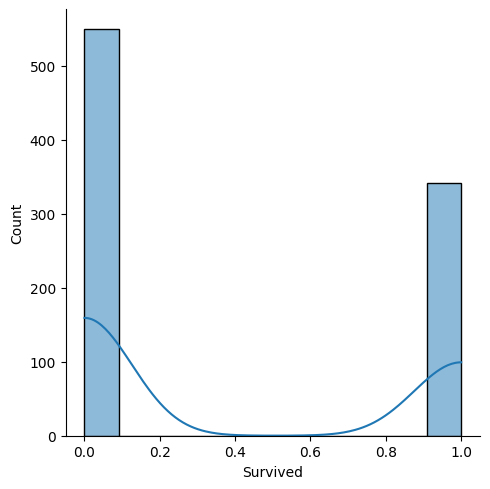

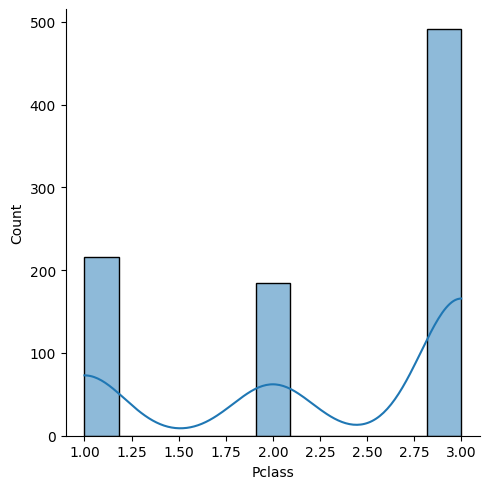

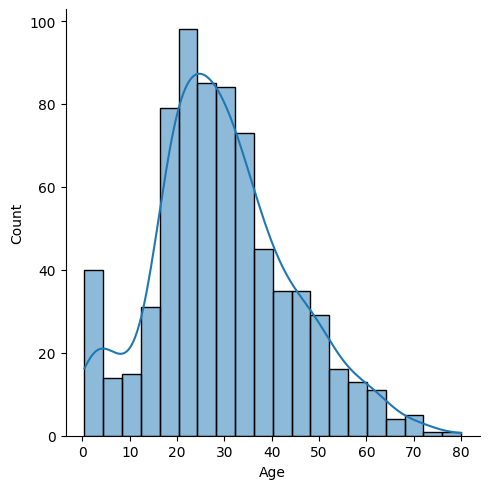

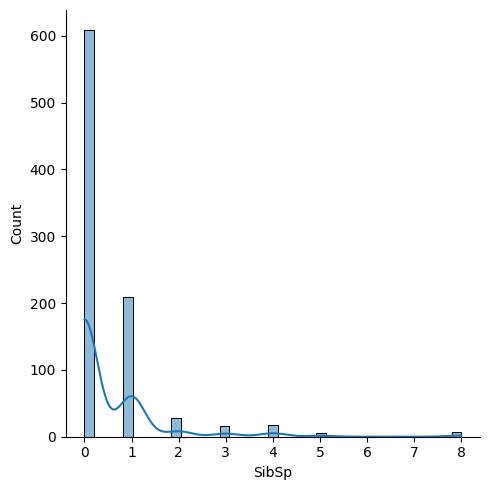

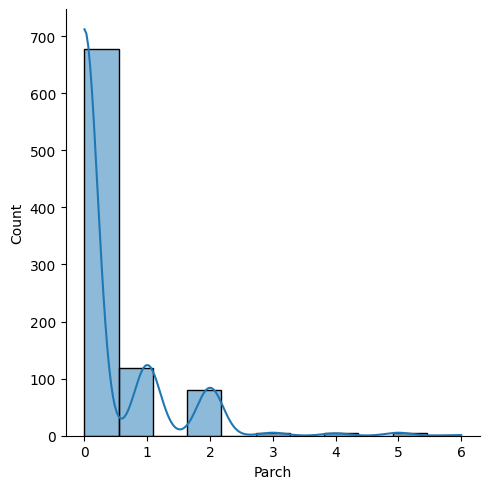

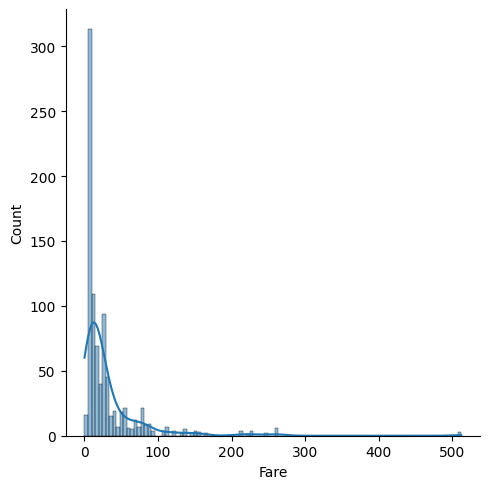

In [6]:
# Visualize numerical data
for c in numerical_columns:
  if c != 'PassengerId':
    sea.displot(train_data[c], kde = True)
    plt.show()

<Axes: >

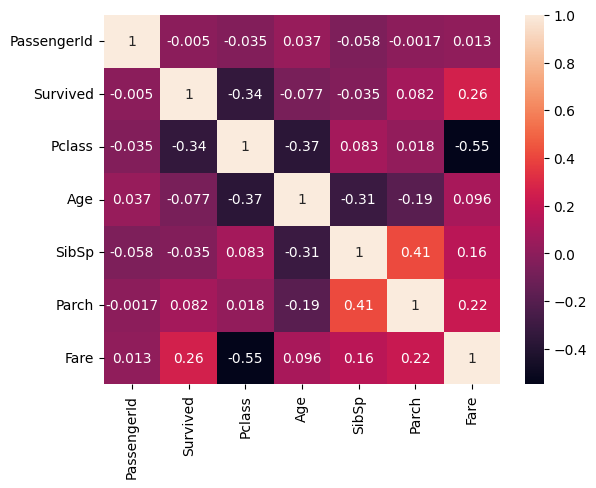

In [7]:
# Correlation between numerical columns (features)
sea.heatmap(numerical_columns.corr(), annot = True)

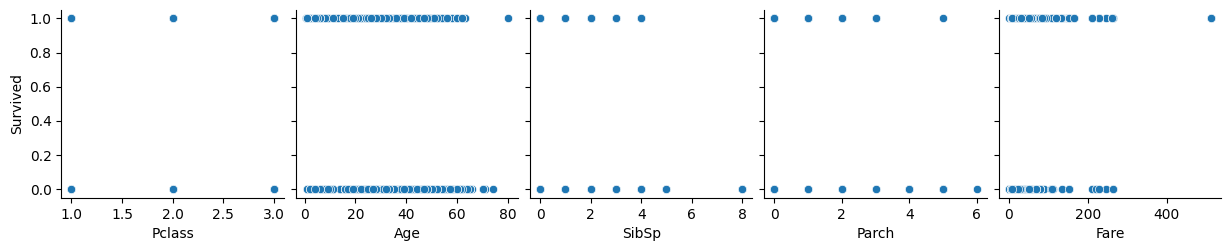

In [8]:
# Scatter plots between different features and Survived
sea.pairplot(numerical_columns, y_vars = 'Survived', x_vars = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

**Data Preprocessing:**

* Impute missing values.
* Encode categorical variables using one-hot encoding or label encoding.
* If needed you can apply more preprocessing methods on the given dataset.

In [9]:
# Check for Nan/Null entries in all features
train_data.isnull().sum()/len(train_data)*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


There are three features that have missing entries.
* In 'Cabin' nearly 77% of the data are missing, so dropping this column
* More details are required to take any action on 'Age' and 'Embarked'

In [10]:
# Dropping 'Cabin' from the training dataset
train_data.drop('Cabin', axis = 1, inplace = True)

In [11]:
# Check for uniques entries in 'Embarked' feature
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
# Dropping NA/Null
train_data = train_data.dropna(subset = ['Embarked']).reset_index(drop = True)

In 'Embarked' there are only three types of entries and only 2 entries are missing. Dropping two rows o=in all the dataset will not overall data quality as much as imputing with mode.

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [14]:
# Check skewness of 'Age'
print('Skewness', train_data['Age'].skew())
print('Mean', train_data['Age'].mean())
print('Median', train_data['Age'].median())
print('difference between mean and median in %', ((train_data['Age'].mean() - train_data['Age'].median())/train_data['Age'].mean())*100)

Skewness 0.3888806178753708
Mean 29.64209269662921
Median 28.0
difference between mean and median in % 5.53973268161307


The mean and the median are close to each other. Additianlly, the skewness factor is also less than 0.5. So, the missing data can be imputed using the median.

In [15]:
# Impute missing data with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.5+ KB


In [17]:
# Check for unique entries
print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [19]:
# Applying onehot encoding to 'Sex' feature
ohencoder = OneHotEncoder(drop = 'first')
oh_gender = ohencoder.fit_transform(train_data[['Sex']]).toarray()
oh_gender = pd.DataFrame(oh_gender, columns = ['male'])
oh_gender.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [20]:
# Applying Label encoding to 'Embarked' feature
le = LabelEncoder()
train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2


In [21]:
# Join data frames
final_train_data = pd.concat([train_data, oh_gender], axis = 1)
final_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,1.0


In [22]:
# Dropping a few features
final_train_data.drop(['Sex', 'Name', 'Ticket'], axis = 1, inplace = True)

In [23]:
final_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Embarked     889 non-null    int64  
 8   male         889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.6 KB


In [24]:
final_train_data.drop('PassengerId', axis = 1, inplace = True)

**Building Predictive Models:**

* Split the preprocessed dataset into training and testing sets.
* Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
* Build predictive models using LightGBM and XGBoost algorithms.
* Train the models on the training set and evaluate their performance on the testing set.
* Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [25]:
# Loading different modules
from sklearn.model_selection import train_test_split as tts
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [26]:
# Spliting training data in X and Y
x_train, x_test, y_train, y_test = tts(final_train_data.drop('Survived', axis = 1), final_train_data['Survived'], test_size = 0.2, random_state = 42)

In [27]:
# Pre-selection of few parameters
parmeters_grid = {'n_estimators': [10, 50, 100, 150], 'max_depth': [3, 6, 9, 12, 15]}

In [28]:
# Apply GridSearchCV to get an initial set of hyperparameters
grid_search_lgb = GridSearchCV(lgb.LGBMClassifier(), parmeters_grid, cv = 5)
grid_search_lgb.fit(x_train, y_train)

grid_search_xgb = GridSearchCV(xgb.XGBClassifier(), parmeters_grid, cv = 5)
grid_search_xgb.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 6, 9, 12, 15],
                         'n_estimators': [10, 50, 100, 150]})

In [29]:
print('Best parameters for LightGBM:', grid_search_lgb.best_params_)
print('Best parameters for XGBoost:', grid_search_xgb.best_params_)

Best parameters for LightGBM: {'max_depth': 6, 'n_estimators': 50}
Best parameters for XGBoost: {'max_depth': 6, 'n_estimators': 10}


In [30]:
# Building models using the 'best parameters' as per GridSearchCV as the starting point
model_lgb_01 = lgb.LGBMClassifier(n_estimators = 50, max_depth = 6)
model_xgb_01 = xgb.XGBClassifier(n_estimators = 10, max_depth = 6)

In [31]:
# Training the models
model_lgb_01.fit(x_train, y_train)
model_xgb_01.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred_lgb = model_lgb_01.predict(x_test)
y_pred_xgb = model_xgb_01.predict(x_test)

In [33]:
print('Accuracy Score for LightGBM:', round(accuracy_score(y_test, y_pred_lgb), 4))
print('Precision Score for LightGBM:', round(precision_score(y_test, y_pred_lgb), 4))
print('Recall Score for LightGBM:', round(recall_score(y_test, y_pred_lgb), 4))
print('F1 Score for LightGBM:', round(f1_score(y_test, y_pred_lgb), 4))

Accuracy Score for LightGBM: 0.809
Precision Score for LightGBM: 0.7692
Recall Score for LightGBM: 0.7246
F1 Score for LightGBM: 0.7463


In [34]:
print('Accuracy Score for XGBoost:', round(accuracy_score(y_test, y_pred_xgb), 4))
print('Precision Score for XGBoost:', round(precision_score(y_test, y_pred_xgb), 4))
print('Recall Score for XGBoost:', round(recall_score(y_test, y_pred_xgb), 4))
print('F1 Score for XGBoost:', round(f1_score(y_test, y_pred_xgb), 4))

Accuracy Score for XGBoost: 0.8034
Precision Score for XGBoost: 0.7576
Recall Score for XGBoost: 0.7246
F1 Score for XGBoost: 0.7407


Based on the key metrics using initial 'guess' of hyperparameters, both models LightGBM and XGBoost perform similarly.
* About 75% of the True predictions are correct. LightGBM model is slightly better as the Precision score is 76%, about 1% more than XGBoost model.
* About 80% of the overall predictions are correct and about 28% of actual positives are missed in both models.

**Comparative Analysis:**

* Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
* Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

In [35]:
# RandomizedSearchCV is more efficient method to obtain hyperparameters compared to GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

parmeters_grid_random = {'n_estimators': randint(10, 150), 'max_depth': randint(3, 15), 'learning_rate': uniform(0.01, 0.3)}

random_search_lgb = RandomizedSearchCV(lgb.LGBMClassifier(), parmeters_grid_random, cv = 5)
random_search_lgb.fit(x_train, y_train)

random_search_xgb = RandomizedSearchCV(xgb.XGBClassifier(), parmeters_grid_random, cv = 5)
random_search_xgb.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 216, number of negative: 352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 568, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380282 -> initscore=-0.488353
[LightGBM] [Info] Start training from score -0.488353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bdc0831a810>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdc0836e450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdc0ab60810>})

In [36]:
print('Best parameters for LightGBM:', random_search_lgb.best_params_)
print('Best parameters for XGBoost:', random_search_xgb.best_params_)

Best parameters for LightGBM: {'learning_rate': np.float64(0.27880151971880035), 'max_depth': 14, 'n_estimators': 18}
Best parameters for XGBoost: {'learning_rate': np.float64(0.09022989470430869), 'max_depth': 8, 'n_estimators': 20}


In [37]:
model_lgb_02 = lgb.LGBMClassifier(n_estimators = 15, max_depth = 14, learning_rate = 0.15)
model_xgb_02 = xgb.XGBClassifier(n_estimators = 17, max_depth = 11, learning_rate = 0.25)

In [38]:
model_lgb_02.fit(x_train, y_train)
model_xgb_02.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=17, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred_lgb_02 = model_lgb_02.predict(x_test)
y_pred_xgb_02 = model_xgb_02.predict(x_test)

In [40]:
print('Accuracy Score for LightGBM:', round(accuracy_score(y_test, y_pred_lgb_02), 4))
print('Precision Score for LightGBM:', round(precision_score(y_test, y_pred_lgb_02), 4))
print('Recall Score for LightGBM:', round(recall_score(y_test, y_pred_lgb_02), 4))
print('F1 Score for LightGBM:', round(f1_score(y_test, y_pred_lgb_02), 4))

Accuracy Score for LightGBM: 0.7978
Precision Score for LightGBM: 0.7538
Recall Score for LightGBM: 0.7101
F1 Score for LightGBM: 0.7313


In [41]:
print('Accuracy Score for XGBoost:', round(accuracy_score(y_test, y_pred_lgb_02), 4))
print('Precision Score for XGBoost:', round(precision_score(y_test, y_pred_lgb_02), 4))
print('Recall Score for XGBoost:', round(recall_score(y_test, y_pred_lgb_02), 4))
print('F1 Score for XGBoost:', round(f1_score(y_test, y_pred_lgb_02), 4))

Accuracy Score for XGBoost: 0.7978
Precision Score for XGBoost: 0.7538
Recall Score for XGBoost: 0.7101
F1 Score for XGBoost: 0.7313


Similar to the initail 'guess' for the hyperparameters using GridSearchCV, the 'best' hyperparameters obtained using RandomisedSearchCV for both LightGBM and XGBoost models show a similar performance when compared with their key metrics.

In [42]:
random_search_lgb_02 = RandomizedSearchCV(lgb.LGBMClassifier(), parmeters_grid_random, cv = 5, scoring = 'accuracy')
random_search_lgb_02.fit(x_train, y_train)

random_search_xgb_02 = RandomizedSearchCV(xgb.XGBClassifier(), parmeters_grid_random, cv = 5, scoring = 'accuracy')
random_search_xgb_02.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 216, number of negative: 352
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 568, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380282 -> initscore=-0.488353
[LightGBM] [Info] Start training from score -0.488353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bdc0831a810>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdc0836e450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bdc0ab60810>},
                   scoring='accuracy')

In [43]:
print('Best parameters for LightGBM:', random_search_lgb_02.best_params_)
print('Best parameters for XGBoost:', random_search_xgb_02.best_params_)

Best parameters for LightGBM: {'learning_rate': np.float64(0.08261682503990066), 'max_depth': 10, 'n_estimators': 63}
Best parameters for XGBoost: {'learning_rate': np.float64(0.02848241135962737), 'max_depth': 11, 'n_estimators': 53}


In [44]:
model_lgb_03 = lgb.LGBMClassifier(n_estimators = 102, max_depth = 4, learning_rate = 0.10)
model_xgb_03 = xgb.XGBClassifier(n_estimators = 35, max_depth = 7, learning_rate = 0.10)

In [45]:
model_lgb_03.fit(x_train, y_train)
model_xgb_03.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=35, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred_lgb_03 = model_lgb_03.predict(x_test)
y_pred_xgb_03 = model_xgb_03.predict(x_test)

In [47]:
print('Accuracy Score for LightGBM:', round(accuracy_score(y_test, y_pred_lgb_03), 4))
print('Precision Score for LightGBM:', round(precision_score(y_test, y_pred_lgb_03), 4))
print('Recall Score for LightGBM:', round(recall_score(y_test, y_pred_lgb_03), 4))
print('F1 Score for LightGBM:', round(f1_score(y_test, y_pred_lgb_03), 4))

Accuracy Score for LightGBM: 0.809
Precision Score for LightGBM: 0.7692
Recall Score for LightGBM: 0.7246
F1 Score for LightGBM: 0.7463


In [48]:
print('Accuracy Score for XGBoost:', round(accuracy_score(y_test, y_pred_xgb_03), 4))
print('Precision Score for XGBoost:', round(precision_score(y_test, y_pred_xgb_03), 4))
print('Recall Score for XGBoost:', round(recall_score(y_test, y_pred_xgb_03), 4))
print('F1 Score for XGBoost:', round(f1_score(y_test, y_pred_xgb_03), 4))

Accuracy Score for XGBoost: 0.7865
Precision Score for XGBoost: 0.7313
Recall Score for XGBoost: 0.7101
F1 Score for XGBoost: 0.7206


Upon using the tuned hyperparameters using RandomisedSearchCV on the two models,the LightGBM performs better than XGBoost.

In [49]:
from xgboost import plot_importance as pi_xgb
from lightgbm import plot_importance as pi_lbm

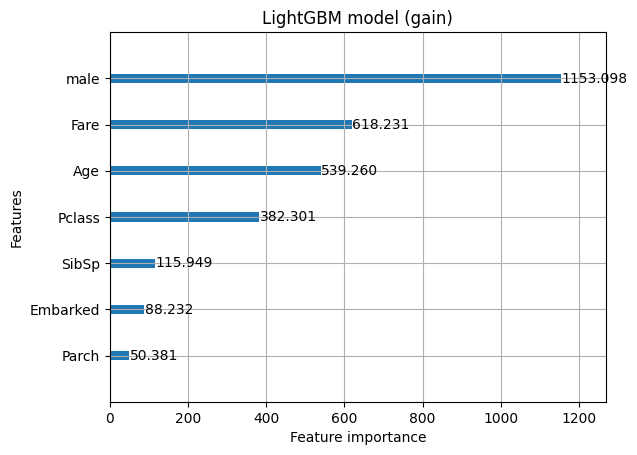

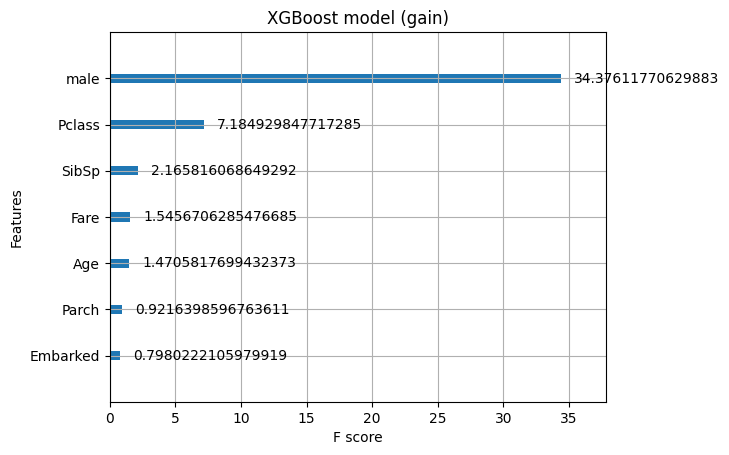

In [85]:
pi_lbm(model_lgb_03, importance_type = 'gain')
plt.title('LightGBM model (gain)')

pi_xgb(model_xgb_03, importance_type = 'gain')
plt.title('XGBoost model (gain)')
plt.show()

* Y-axis: Features ranked by importance (top = most important).
* X-axis: Importance score, but measured differently in each model:

* Gain: is a total reduction in losses. The higher the score, the more losses have been reduced to achieve model accuracy.
* Both these models prioritize gender while other feature have different order of importance.

In [73]:
lgb_importance = model_lgb_03.booster_.feature_importance(importance_type = 'gain')
print(pd.DataFrame({
    'Feature': x_train.columns,
    'Gain': lgb_importance,
    'Normalized_Gain': 100 * lgb_importance / sum(lgb_importance)
}).sort_values('Gain', ascending = False))

    Feature         Gain  Normalized_Gain
6      male  1153.097529        39.121839
4      Fare   618.231025        20.975099
1       Age   539.260216        18.295808
0    Pclass   382.300934        12.970556
2     SibSp   115.949442         3.933887
5  Embarked    88.232304         2.993511
3     Parch    50.380796         1.709300


In [83]:
lgb_importance = model_lgb_03.booster_.feature_importance(importance_type = 'split')
print(pd.DataFrame({
    'Feature': x_train.columns,
    'Split': lgb_importance,
    'Normalized_Split': 100 * lgb_importance / sum(lgb_importance)
}).sort_values('Split', ascending = False))

    Feature  Split  Normalized_Split
4      Fare    344         38.608305
1       Age    296         33.221100
2     SibSp     61          6.846240
6      male     56          6.285073
0    Pclass     53          5.948373
5  Embarked     44          4.938272
3     Parch     37          4.152637


In [78]:
xgb_importance_dict = model_xgb_03.get_booster().get_score(importance_type = 'gain')

# Convert the dictionary to a DataFrame
xgb_importance = pd.DataFrame({
    'Feature': list(xgb_importance_dict.keys()),
    'Gain': list(xgb_importance_dict.values())
})

# Align the features with the original columns
# This step ensures that all features from x_train.columns are considered
xgb_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Gain': xgb_importance.set_index('Feature').reindex(x_train.columns, fill_value=0)['Gain'].values
})


# Calculate normalized gain
xgb_importance['Normalized_Gain'] = 100 * xgb_importance['Gain'] / sum(xgb_importance['Gain'])

print(xgb_importance.sort_values('Gain', ascending=False))

    Feature       Gain  Normalized_Gain
6      male  34.376118        70.933032
0    Pclass   7.184930        14.825666
2     SibSp   2.165816         4.469030
4      Fare   1.545671         3.189397
1       Age   1.470582         3.034456
3     Parch   0.921640         1.901748
5  Embarked   0.798022         1.646670


In [82]:
xgb_importance_dict = model_xgb_03.get_booster().get_score(importance_type = 'weight')

# Convert the dictionary to a DataFrame
xgb_importance = pd.DataFrame({
    'Feature': list(xgb_importance_dict.keys()),
    'Split': list(xgb_importance_dict.values())
})

# Align the features with the original columns
# This step ensures that all features from x_train.columns are considered
xgb_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Split': xgb_importance.set_index('Feature').reindex(x_train.columns, fill_value=0)['Split'].values
})


# Calculate normalized gain
xgb_importance['Normalized_Split'] = 100 * xgb_importance['Split'] / sum(xgb_importance['Split'])

print(xgb_importance.sort_values('Split', ascending=False))

    Feature  Split  Normalized_Split
4      Fare  419.0         40.998043
1       Age  328.0         32.093933
2     SibSp   71.0          6.947162
5  Embarked   68.0          6.653620
0    Pclass   51.0          4.990215
3     Parch   50.0          4.892368
6      male   35.0          3.424658


* XGBoost model concentrates on two main features, while LightGBM distributes importance across 4 features
* A general commonality of the two models is the gender importance for survivability
* The model performance metrics (e.g., accuracy, precision, etc.) are slightly better for LightGBM compared to XGBM
* It is worth considering that in LightGBM the tree growth occurs leaf-wise and in XGBM depth-wise. Due to this, the different features may have varying levels of importance.

In [51]:
# Get test dataset info like dtype, missing entries
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [52]:
test_data.isnull().sum()/len(test_data)*100

,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,78.229665


Similar to the training dataset, 'Cabin' feature has nearly 78% missing, so it can be dropped. Other two features are 'Age' and 'Fare'.

In [53]:
test_data.drop('Cabin', axis = 1, inplace = True)

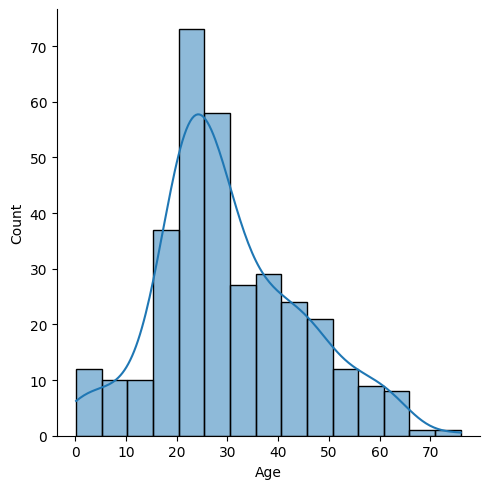

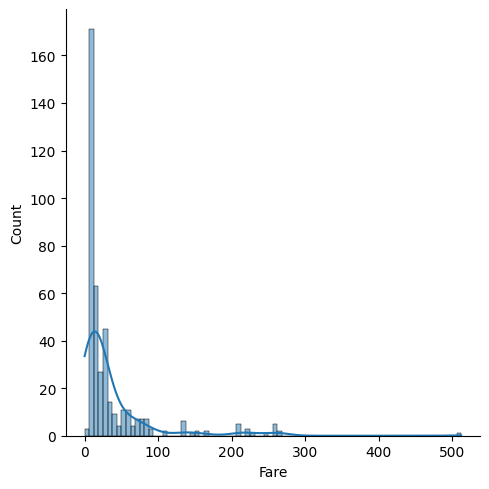

In [54]:
sea.displot(test_data['Age'], kde = True)
sea.displot(test_data['Fare'], kde = True)

In [55]:
# Check skewness, mean and median to decide on imputation of data to 'Age'
print(test_data['Age'].skew())
print(test_data['Age'].mean())
print(test_data['Age'].median())
print(((test_data['Age'].mean() - test_data['Age'].median())/test_data['Age'].mean())*100)

0.4573612871503845
30.272590361445783
27.0
10.8104074424158


The skewness factor is < 0.5 and the percentage difference between mean and median is around 10%, so imputing data with median would be a good estimate considering the outliers involved.

In [56]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [58]:
# Check skewness, mean and median to decide on imputation of data to 'Fare'
print(test_data['Fare'].skew())
print(test_data['Fare'].mean())
print(test_data['Fare'].median())
print(((test_data['Fare'].mean() - test_data['Fare'].median())/test_data['Fare'].mean())*100)

3.6872133081121405
35.627188489208635
14.4542
59.429299327455674


The percentage difference between mean and median in feature 'Fare' is close to 60%. Therefore, more advanced techniques like log or sqrt transformation (mean > median) can be applied to make an estimation for imputing the missing entries. However, it is worth noting that only one data entry is missing in 'Fare', so droping 0.24% of the whole dataset might not have much impact on the overall prediction. Additinally, tree-based models like XGBoost handles skewness better, hence data transformation not required.

In [59]:
# Dropping NA/Null
test_data = test_data.dropna(subset = ['Fare']).reset_index(drop = True)

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [61]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [62]:
# Apply Label encoding to 'Embarked' feature
test_data['Embarked'] = le.transform(test_data['Embarked'])

In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2


In [64]:
# Apply OneHot Encoding to 'Sex' feature
oh_gender_test = ohencoder.transform(test_data[['Sex']]).toarray()
oh_gender_test = pd.DataFrame(oh_gender_test, columns = ['male'])
oh_gender_test

,male
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
412,1.0
413,0.0
414,1.0
415,1.0


In [65]:
final_test_data = pd.concat([test_data, oh_gender_test], axis = 1)
final_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,1,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,2,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,1,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,2,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,2,0.0


In [66]:
final_test_data.drop(['PassengerId', 'Sex', 'Name', 'Ticket'], axis = 1, inplace = True)
final_test_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,1,1.0
1,3,47.0,1,0,7.0000,2,0.0
2,2,62.0,0,0,9.6875,1,1.0
3,3,27.0,0,0,8.6625,2,1.0
4,3,22.0,1,1,12.2875,2,0.0
